
1. How many  multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

  Answer:
  Multiplication of m1 = [[a,b,c],[d,e,f],[g,h,i]] and m2 = [[j,k,l],[m,n,o],[p,q,r]]

  ans = m1 * m2

  ans[0][0] = a*j + b*k + c*l

  ans[0][1] = a*m + b*n + c*o

  ans[0][2] = a*p + b*q + c*r

  Thus for calculating values of 1 row of 2 3 \* 3 matrixes requires 9 multiplications and 6 additions
  Thus total = 27 multplications and 18 additions

  Multiplications: n * m * k
  Additions : n * m * (k-1)


2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [3]:
def mul(m1,m2):
  if len(m1[0]) != len(m2):
        print("Number of columns in the first matrix must equal the number of rows in the second matrix.")

  result = [[0 for _ in range(len(m2[0]))] for _ in range(len(m1))]

  for i in range(len(m1)):
      for j in range(len(m2[0])):
          for k in range(len(m2)):
              result[i][j] += m1[i][k] * m2[k][j]
  return result

In [6]:
import numpy as np
import time

matrix1 = [[1, 2, 3], [4, 5, 6]]
matrix2 = [[7, 8], [9, 10], [11, 12]]

start_time = time.time()
result_lt = mul(matrix1, matrix2)
end_time = time.time()
list_time = end_time - start_time

print("\nResult using List:")
print(result_lt)
print(f"Time taken (List): {list_time:.6f} seconds")

matrix1_np = np.array([[1, 2, 3], [4, 5, 6]])
matrix2_np = np.array([[7, 8], [9, 10], [11, 12]])

start_time = time.time()
result_np = np.dot(matrix1_np, matrix2_np)
end_time = time.time()
numpy_time = end_time - start_time

print("\nResult using NumPy:")
print(result_np)
print(f"Time taken (NumPy): {numpy_time:.6f} seconds")

print(f"\nNumPy is faster than list of lists by: {list_time - numpy_time:.6f} seconds \n Because Operations on lists involves:")
print(f"\nType checking , Pointer dereferencing , Dynamic memory management while NumPy avoids much of this overhead by knowing the array structure in advance.")


Result using List:
[[58, 64], [139, 154]]
Time taken (List): 0.000061 seconds

Result using NumPy:
[[ 58  64]
 [139 154]]
Time taken (NumPy): 0.000084 seconds

NumPy is faster than list of lists by: -0.000023 seconds 
 Because Operations on lists involves:

Type checking , Pointer dereferencing , Dynamic memory management while NumPy avoids much of this overhead by knowing the array structure in advance.


3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?


In [19]:
# Finding Highest element in list
ls = [2,1,4,6,8,2,9,3]
max = ls[0]
for i in range(len(ls)):
  if max < ls[i]:
    max = ls[i]
print(max)

9


In [20]:
# Finding second highest element
for i in range(len(ls)):
  if max == ls[i]:
    ls[i] = 0
max = ls[0]
for i in range(len(ls)):
  if max < ls[i]:
    max = ls[i]
print(max)

8


In [42]:
# Finding median using K passes
import time

start = time.time()
ls = [2,1,4,6,8,2,9,3]
k = len(ls)/2
print("Value of K is :",k)

max = ls[0]
for i in range(len(ls)):
  if max < ls[i]:
    max = ls[i]

while k>0:
  for i in range(len(ls)):
    if ls[i] == max:
      ls[i] = 0
  max = ls[0]
  for i in range(len(ls)):
    if max < ls[i]:
      max = ls[i]
  k-=1

max = ls[0]
for i in range(len(ls)):
  if max < ls[i]:
    max = ls[i]
print(max)
print(ls)
end = time.time()
kpass_time = end-start
print(f"Time taken : {end-start}")




Value of K is : 4.0
3
[2, 1, 0, 0, 0, 2, 0, 3]
Time taken : 0.0005469322204589844


In [43]:
# Better approack
start = time.time()
ls = [2,1,4,6,8,2,9,3]
ls.sort()
print(ls)

size = len(ls)
if size%2 == 0:
  median = ls[size//2]
  print(median)
else:
  median = (ls[size//2] + ls[size//2 - 1])/2
  print(median)
end = time.time()
my_time = end-start
print(f"Time taken : {end-start}")

[1, 2, 2, 3, 4, 6, 8, 9]
4
Time taken : 0.0005795955657958984


In [44]:
start = time.time()
arr = np.array([2,1,4,6,8,2,9,3])
np.median(arr)
end = time.time()
numpy_time = end-start
print(f"Time taken : {end-start}")

Time taken : 0.0040130615234375


**Thus np.median performs well. My approach takes more time to sort the list and in k pass approach we iterate the list unnecessary.**


4. What is the gradient of the following function with respect to x and y?

  Gradient of f(x,y) = (partial derivative w.r.t x, partial derivative w.r.t y)

  partial derivative w.r.t x = 2xy + y^3cos(x)

  partial derivative w.r.t y = x^2 + 3y^2sin(x)

  Gradient of f(x,y) = (2xy + y^3cos(x), x^2 + 3y^2sin(x))

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [46]:
import jax
import jax.numpy as jnp

def f(xy):
    x, y = xy
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f)

def analytical_grad(xy):
    x, y = xy
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

x = 1.0
y = 1.5
print("Comparing gradients at random points:\n")
auto_grad = grad_f((x, y))
manual_grad = analytical_grad((x, y))
print(f"(x, y) = ({x:.3f}, {y:.3f})")
print(f"JAX grad     = {auto_grad}")
print(f"Manual grad  = {manual_grad}")

Comparing gradients at random points:

(x, y) = (1.000, 1.500)
JAX grad     = (Array(4.82352, dtype=float32, weak_type=True), Array(6.679929, dtype=float32, weak_type=True))
Manual grad  = [4.82352  6.679929]


6. Use sympy to confirm that you obtain the same gradient analytically.

In [47]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

gradient = [df_dx, df_dy]

print("Symbolic Gradient:")
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)

Symbolic Gradient:
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks

In [16]:
dict = { 2022: { 'Branch 1' : { 'Roll No' : 1, 'Name' : 'N' , 'Marks' : { 'Maths' : 100, 'English' : 70}

} ,
                 'Branch 2' : { 'Roll No' : 2, 'Name' : 'M' , 'Marks' : { 'Maths' : 80, 'English' : 60}

                 }

},

         2023: { 'Branch 1' : { 'Roll No' : 3, 'Name' : 'I' , 'Marks' : { 'Maths' : 100, 'English' : 50}

} ,
                 'Branch 2' : { 'Roll No' : 4, 'Name' : 'D' , 'Marks' : { 'Maths' : 70, 'English' : 60}

                 }

         }
}

print(dict)

{2022: {'Branch 1': {'Roll No': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {'Roll No': 2, 'Name': 'M', 'Marks': {'Maths': 80, 'English': 60}}}, 2023: {'Branch 1': {'Roll No': 3, 'Name': 'I', 'Marks': {'Maths': 100, 'English': 50}}, 'Branch 2': {'Roll No': 4, 'Name': 'D', 'Marks': {'Maths': 70, 'English': 60}}}}


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



In [18]:
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch_name, students):
        self.branch_name = branch_name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

student1 = Student(1, 'N', {'Maths': 100, 'English': 70})
student2 = Student(2, 'M', {'Maths': 80, 'English': 60})

branch1 = Branch('Branch 1', [student1, student2])
branch2 = Branch('Branch 2', [student1, student2])

year = Year(2022, [branch1, branch2])


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

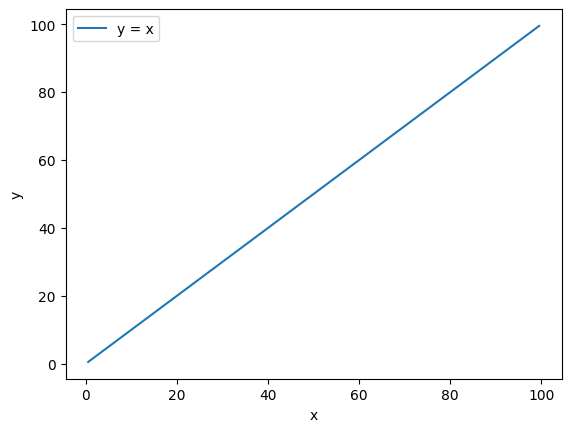

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.0, 0.5)
plt.plot(x, x, label='y = x')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

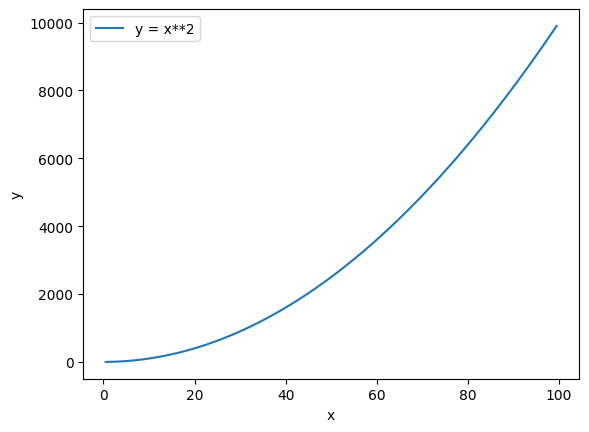

In [9]:
plt.plot(x, x**2, label='y = x**2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

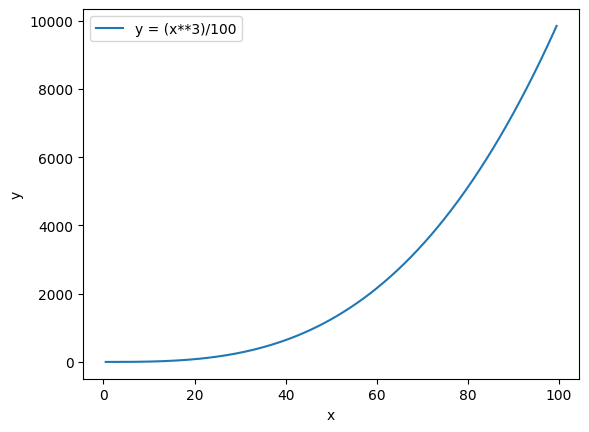

In [11]:
y = (x**3)/100
plt.plot(x, y , label='y = (x**3)/100')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

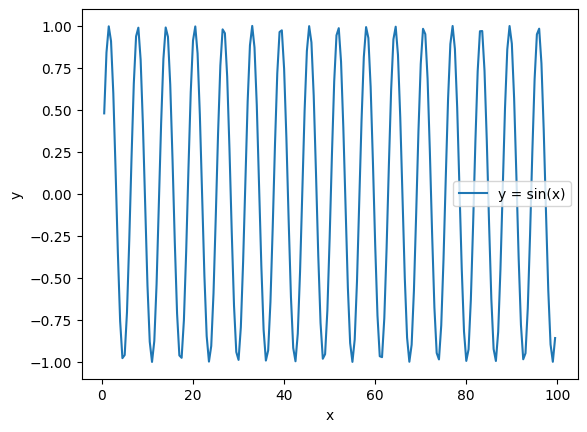

In [12]:
plt.plot(x, np.sin(x), label='y = sin(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

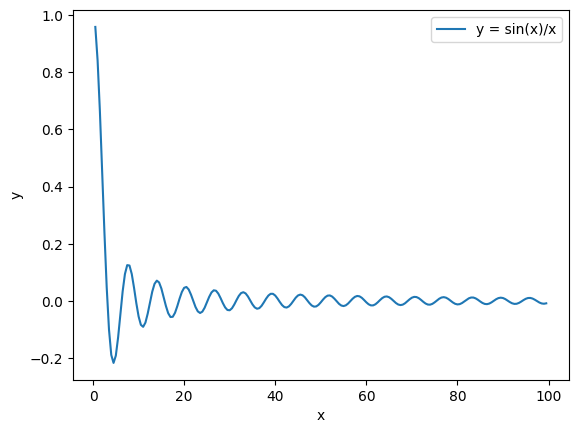

In [13]:
z = (np.sin(x))/x
plt.plot(x, z , label='y = sin(x)/x')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

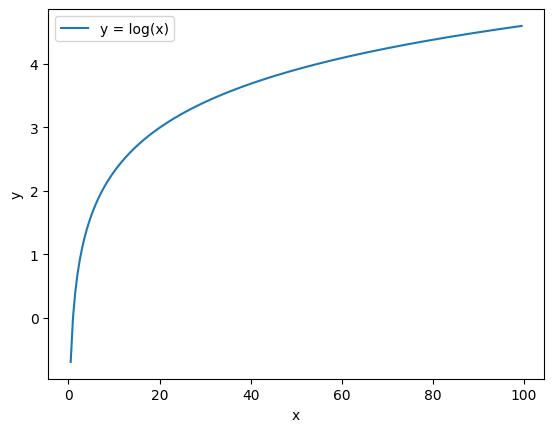

In [14]:
plt.plot(x, np.log(x), label='y = log(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

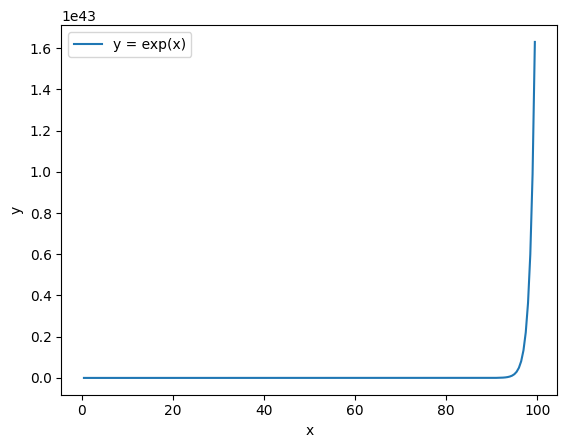

In [15]:
plt.plot(x, np.exp(x), label='y = exp(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [1]:
import numpy as np
matrix = np.random.uniform(1, 3, size=(20, 5))
print(matrix)


[[2.67411272 2.41336126 1.80983899 1.97433119 1.36096833]
 [2.3385623  1.45118156 1.00917367 1.91438376 1.42433378]
 [1.56503495 2.66095732 2.59252682 2.48590215 1.27190841]
 [2.60305017 1.38877921 2.8591326  2.6602093  1.90821456]
 [1.45673935 1.08592313 2.52498866 2.25431733 1.49996959]
 [2.90996992 2.76732359 1.44515964 2.60145413 2.59731669]
 [1.82222369 2.69555827 1.61463576 2.14784606 1.93086845]
 [2.52082892 1.51246074 2.48618618 1.65086128 2.05234822]
 [2.38174421 1.83084842 2.97159154 1.40728865 1.74127167]
 [1.43198223 2.52432405 1.27128892 1.3891481  1.0860725 ]
 [1.65446697 1.40036054 2.50205779 2.32534825 1.68797846]
 [1.23872004 1.73389414 1.93483184 1.78808807 2.5926644 ]
 [1.78209154 2.76699027 2.696298   1.97393212 2.661972  ]
 [2.48485623 2.78259329 1.65565701 1.62496208 2.80608243]
 [1.01089216 1.98503886 1.4670724  1.5662187  2.25502299]
 [2.54236756 1.52678909 2.10580454 1.00097073 2.90400804]
 [1.569332   1.78203377 1.58506021 1.50716948 2.78940605]
 [1.89137659 2

In [2]:
import pandas as pd

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

std_dev = df.std()
highest_std_col = std_dev.idxmax()
print(f"Column with the highest standard deviation: {highest_std_col}")

row_means = df.mean(axis=1)
lowest_mean_row = row_means.idxmin()
print(f"Row with the lowest mean (index): {lowest_mean_row}")

Column with the highest standard deviation: c
Row with the lowest mean (index): 9


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [3]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
df

,a,b,c,d,e,f,g
0,2.674113,2.413361,1.809839,1.974331,1.360968,10.232612,GT8
1,2.338562,1.451182,1.009174,1.914384,1.424334,8.137635,GT8
2,1.565035,2.660957,2.592527,2.485902,1.271908,10.576330,GT8
3,2.603050,1.388779,2.859133,2.660209,1.908215,11.419386,GT8
4,1.456739,1.085923,2.524989,2.254317,1.499970,8.821938,GT8
5,2.909970,2.767324,1.445160,2.601454,2.597317,12.321224,GT8
6,1.822224,2.695558,1.614636,2.147846,1.930868,10.211132,GT8
7,2.520829,1.512461,2.486186,1.650861,2.052348,10.222685,GT8
8,2.381744,1.830848,2.971592,1.407289,1.741272,10.332744,GT8
9,1.431982,2.524324,1.271289,1.389148,1.086073,7.702816,LT8


In [4]:
total_values = df['g'].value_counts()
lt8_value = total_values.get('LT8', 0)
print(f"Number of rows where 'g' is 'LT8': {lt8_value}")

Number of rows where 'g' is 'LT8': 1


In [5]:
std_dev_lt8 = df[df['g'] == 'LT8']['f'].std()
print(f"Standard deviation of 'f' for rows where 'g' is 'LT8': {std_dev_lt8}")

std_dev_gt8 = df[df['g'] == 'GT8']['f'].std()
print(f"Standard deviation of 'f' for rows where 'g' is 'GT8': {std_dev_gt8}")

Standard deviation of 'f' for rows where 'g' is 'LT8': nan
Standard deviation of 'f' for rows where 'g' is 'GT8': 1.132189464216626


12. Write a small piece of code to explain broadcasting in numpy.



In [7]:
a = np.array([1, 2, 3])
b = 2
result1 = a * b
print("Example 1 (Scalar and array):\n", result1)

c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([10, 20, 30])
result2 = c + d
print("\nExample 2 (Arrays of different shapes):\n", result2)

Example 1 (Scalar and array):
 [2 4 6]

Example 2 (Arrays of different shapes):
 [[11 22 33]
 [14 25 36]]


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [6]:
def argmin(num):
  min = num[0]

  for i in range(len(num)):
    if min > num[i]:
      min = num[i]

  index = np.where(num == min)
  index = index[0][0]
  return index

In [7]:
num = np.array([4,3,5,1,7,8,3,5])
print(f"Minimum value is at index : {argmin(num)}")

Minimum value is at index : 3


In [8]:
print(f"Verification : {np.argmin(num)}")

Verification : 3
